In [1]:
import pandas as pd
import numpy as np

import semopy
from semopy import Model # SEM
from semopy import semplot

import statsmodels.api as sm
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

import seaborn as sns
import matplotlib.pyplot as plt

import matplotlib.pyplot as plt
import graphviz

In [2]:
data = pd.read_excel("D://survey_data/research_data_updated.xlsx")

In [3]:
data.head()

,engagement,passion,initiative,commitment,culture_organic,culture_bureaucratic,culture_entrepreneurial,culture_participatory,attachment_safe,attachment_avoidant,attachment_ambivalent,belongingness,self_definition
0,3.716667,3.8,3.75,3.6,4,2,4,2,3.500000,2.2,2.166667,25,20
1,3.566667,3.4,3.50,3.8,4,2,2,4,3.333333,2.4,2.166667,20,19
2,3.400000,3.4,3.00,3.8,4,6,2,0,4.666667,4.6,4.333333,21,28
3,4.366667,4.4,4.50,4.2,6,0,5,1,3.000000,4.0,3.166667,14,11
4,3.950000,4.4,3.25,4.2,3,3,2,4,3.666667,2.0,2.000000,19,15


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 142 entries, 0 to 141
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   engagement               142 non-null    float64
 1   passion                  142 non-null    float64
 2   initiative               142 non-null    float64
 3   commitment               142 non-null    float64
 4   culture_organic          142 non-null    int64  
 5   culture_bureaucratic     142 non-null    int64  
 6   culture_entrepreneurial  142 non-null    int64  
 7   culture_participatory    142 non-null    int64  
 8   attachment_safe          142 non-null    float64
 9   attachment_avoidant      142 non-null    float64
 10  attachment_ambivalent    142 non-null    float64
 11  belongingness            142 non-null    int64  
 12  self_definition          142 non-null    int64  
dtypes: float64(7), int64(6)
memory usage: 14.6 KB


In [4]:
# Стандартизируем данные перед PCA
scaler = StandardScaler()
culture_vars = data[['culture_organic', 'culture_bureaucratic', 'culture_entrepreneurial', 'culture_participatory']]
culture_scaled = scaler.fit_transform(culture_vars)

# Применяем PCA
pca = PCA(n_components=1)  # Оставляем одну главную компоненту
data["culture_pca"] = pca.fit_transform(culture_scaled)

# Проверяем дисперсию
print("Процент объясненной дисперсии:", pca.explained_variance_ratio_)

Процент объясненной дисперсии: [0.46224339]


In [5]:
# Создаем кубические компоненты всех переменных

#data["engagement_3"] = data["engagement"] ** 3   # зависимую переменную мы не возводим в куб

data['culture_organic'] = data['culture_organic'] ** 3
data['culture_bureaucratic'] = data['culture_bureaucratic'] ** 3
data['culture_entrepreneurial'] = data['culture_entrepreneurial'] ** 3
data['culture_participatory'] = data['culture_participatory'] ** 3

data["culture_pca_3"] = data["culture_pca"] ** 3

data["attachment_safe_3"] = data["attachment_safe"] ** 3
data["attachment_avoidant_3"] = data["attachment_avoidant"] ** 3
data["attachment_ambivalent_3"] = data["attachment_ambivalent"] ** 3

data["belongingness_3"] = data["belongingness"] ** 3
data["self_definition_3"] = data["self_definition"] ** 3

In [6]:
data

,engagement,passion,initiative,commitment,culture_organic,culture_bureaucratic,culture_entrepreneurial,culture_participatory,attachment_safe,attachment_avoidant,attachment_ambivalent,belongingness,self_definition,culture_pca,culture_pca_3,attachment_safe_3,attachment_avoidant_3,attachment_ambivalent_3,belongingness_3,self_definition_3
0,3.716667,3.8,3.75,3.6,64,8,64,8,3.500000,2.2,2.166667,25,20,-0.132230,-0.002312,42.875000,10.648,10.171296,15625,8000
1,3.566667,3.4,3.50,3.8,64,8,8,64,3.333333,2.4,2.166667,20,19,-0.160067,-0.004101,37.037037,13.824,10.171296,8000,6859
2,3.400000,3.4,3.00,3.8,64,216,8,0,4.666667,4.6,4.333333,21,28,0.405693,0.066772,101.629630,97.336,81.370370,9261,21952
3,4.366667,4.4,4.50,4.2,216,0,125,1,3.000000,4.0,3.166667,14,11,0.787578,0.488518,27.000000,64.000,31.754630,2744,1331
4,3.950000,4.4,3.25,4.2,27,27,8,64,3.666667,2.0,2.000000,19,15,-0.613012,-0.230360,49.296296,8.000,8.000000,6859,3375
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
137,2.750000,2.6,3.25,2.4,343,1,1,27,2.333333,4.0,3.333333,15,13,1.467728,3.161819,12.703704,64.000,37.037037,3375,2197
138,3.466667,3.6,4.00,2.8,27,27,64,8,3.000000,2.6,2.500000,21,21,-0.585175,-0.200381,27.000000,17.576,15.625000,9261,9261
139,4.100000,3.8,4.50,4.0,0,1000,8,0,4.000000,4.2,4.000000,22,24,-1.406085,-2.779936,64.000000,74.088,64.000000,10648,13824
140,2.616667,2.4,3.25,2.2,1,8,216,27,2.166667,3.2,1.666667,13,9,-1.887547,-6.725016,10.171296,32.768,4.629630,2197,729


In [7]:
# Обновляем описание модели
model_desc = """
    engagement_3 ~ culture_pca_3

    attachment_safe_3 ~ culture_pca_3
    attachment_avoidant_3 ~ culture_pca_3
    attachment_ambivalent_3 ~ culture_pca_3

    belongingness_3 ~ culture_pca_3
    self_definition_3 ~ culture_pca_3

    engagement_3 ~ attachment_safe_3 + attachment_avoidant_3 + attachment_ambivalent_3 + belongingness_3 + self_definition_3
"""

Тут добавили латентные переменные:

In [8]:
data.head(1)

,engagement,passion,initiative,commitment,culture_organic,culture_bureaucratic,culture_entrepreneurial,culture_participatory,attachment_safe,attachment_avoidant,attachment_ambivalent,belongingness,self_definition,culture_pca,culture_pca_3,attachment_safe_3,attachment_avoidant_3,attachment_ambivalent_3,belongingness_3,self_definition_3
0,3.716667,3.8,3.75,3.6,64,8,64,8,3.5,2.2,2.166667,25,20,-0.13223,-0.002312,42.875,10.648,10.171296,15625,8000


In [9]:
model_desc = """
    # Латентные переменные
    
    attachment =~ attachment_safe_3 + attachment_avoidant_3 + attachment_ambivalent_3
    identity =~ belongingness_3 + self_definition_3
    engagement =~ passion + initiative + commitment
    org_culture =~ culture_organic + culture_bureaucratic + culture_entrepreneurial + culture_participatory



    # Пути влияния
    engagement ~ org_culture
    attachment ~ org_culture
    identity ~ org_culture
    
    engagement ~ attachment + identity
"""

In [10]:
model_desc = """
    # Латентные переменные
    
    engagement =~ passion + initiative + commitment
    org_culture =~ culture_organic + culture_bureaucratic + culture_entrepreneurial + culture_participatory
    attachment =~ attachment_safe_3 + attachment_avoidant_3 + attachment_ambivalent_3
    identity =~ belongingness_3 + self_definition_3



    # Пути влияния
    org_culture ~ engagement

    org_culture ~ identity ~ engagement
    # org_culture ~ attachment ~ engagement
    
    #engagement ~ org_culture
    #attachment ~ org_culture
    #identity ~ org_culture
    
    #engagement ~ attachment + identity
"""

In [11]:
model_desc = """
    # Латентные переменные
    org_culture =~ culture_organic + culture_bureaucratic + culture_entrepreneurial + culture_participatory
        
    attachment =~ attachment_safe_3 + attachment_avoidant_3 + attachment_ambivalent_3
    identity =~ belongingness_3 + self_definition_3
    engagement =~ passion + initiative + commitment



    # Пути влияния
    # прямые пути
    engagement ~ org_culture

    #опосредованные пути
    
    attachment ~ org_culture
    engagement ~ attachment 

    identity ~ org_culture
    engagement ~ identity 

    # additional covariances
    identity ~~  engagement
    org_culture ~~   engagement

"""

In [30]:
model_desc = """
    # Латентные переменные
    org_culture =~ culture_organic + culture_bureaucratic + culture_entrepreneurial + culture_participatory
        
    attachment =~ attachment_safe_3 + attachment_avoidant_3 + attachment_ambivalent_3
    identity =~ belongingness_3 + self_definition_3
    engagement =~ passion + initiative + commitment

    # Пути влияния
    # прямые пути
    engagement ~ org_culture

    #опосредованные пути
    
    attachment ~ org_culture
    attachment ~ culture_organic
    attachment ~ culture_bureaucratic
    attachment ~ culture_entrepreneurial
    attachment ~ culture_participatory

    engagement ~ attachment 
    engagement ~ attachment_safe_3
    engagement ~ attachment_avoidant_3
    engagement ~ attachment_ambivalent_3

    identity ~ org_culture
    identity ~ culture_organic
    identity ~ culture_bureaucratic
    identity ~ culture_entrepreneurial
    identity ~ culture_participatory
    
    belongingness_3 ~ culture_organic
    self_definition_3 ~ culture_bureaucratic

    engagement ~ identity 
    engagement ~ self_definition_3 
    engagement ~ belongingness_3 

    # additional covariances
    identity ~~  engagement
    org_culture ~~   engagement

"""

In [31]:
# Создаем и обучаем модель
model = Model(model_desc)
model.fit(data)

SolverResult(fun=2.377949357214497, success=True, n_it=769, x=array([ 1.84421326e+02, -3.59357607e+01, -7.23860288e+01,  2.23129688e+02,
        3.16515883e+02,  1.91888182e-01,  7.75532546e-01,  1.06623849e+00,
        2.20581061e+01, -1.21499895e+01,  6.95813056e-03,  1.24235837e-02,
        2.97384075e-01, -6.01007334e-05,  3.38988082e-06,  9.20357555e-05,
        7.30996482e-01,  2.27958080e-05,  2.72037166e-05, -1.06704577e-05,
       -2.36535242e-05, -6.28370757e+00,  2.78022167e+01,  1.97141477e+00,
       -8.65629594e+00, -1.47504529e+01, -2.89700935e+01,  6.05852677e+00,
       -9.99054900e+01,  4.22847854e-01, -5.56617810e-01,  6.00771025e-03,
        4.99382597e-22,  3.49692077e+01,  3.01347184e+02,  3.51023607e+02,
        9.01437889e+06,  2.56046982e-01,  6.88409611e+03,  2.57420977e+03,
        3.67445456e+04,  1.88857652e+03,  4.83255921e+01,  2.85485358e-01,
        2.07210085e-01,  2.28764549e+07]), message='Optimization terminated successfully', name_method='SLSQP', n

In [32]:
model_summary = model.inspect()
#model_summary['p-value'] = round(model_summary['p-value'], 7)
model_summary

,lval,op,rval,Estimate,Std. Err,z-value,p-value
0,culture_organic,~,org_culture,1.000000e+00,-,-,-
1,culture_bureaucratic,~,org_culture,1.844213e+02,20.319528,9.076063,0.0
2,culture_entrepreneurial,~,org_culture,-3.593576e+01,50.797363,-0.707434,0.479297
3,culture_participatory,~,org_culture,-7.238603e+01,44.809487,-1.615417,0.10622
4,attachment_safe_3,~,attachment,1.000000e+00,-,-,-
5,attachment_avoidant_3,~,attachment,2.231297e+02,15.033504,14.842161,0.0
6,attachment_ambivalent_3,~,attachment,3.165159e+02,10.322595,30.662433,0.0
7,belongingness_3,~,identity,1.000000e+00,-,-,-
8,self_definition_3,~,identity,1.918882e-01,0.080935,2.370886,0.017745
9,engagement,~,org_culture,2.205811e+01,10.348978,2.131428,0.033054


SEM Model diagram


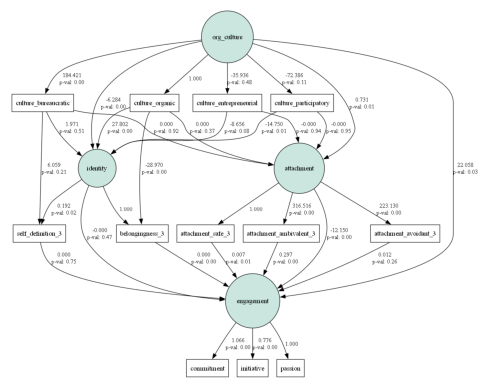

In [33]:
semopy.semplot(model, 'sem_model.png')
print("SEM Model diagram")
img = plt.imread('sem_model.png')
plt.imshow(img)
plt.axis('off')
plt.show()

SEM Model diagram


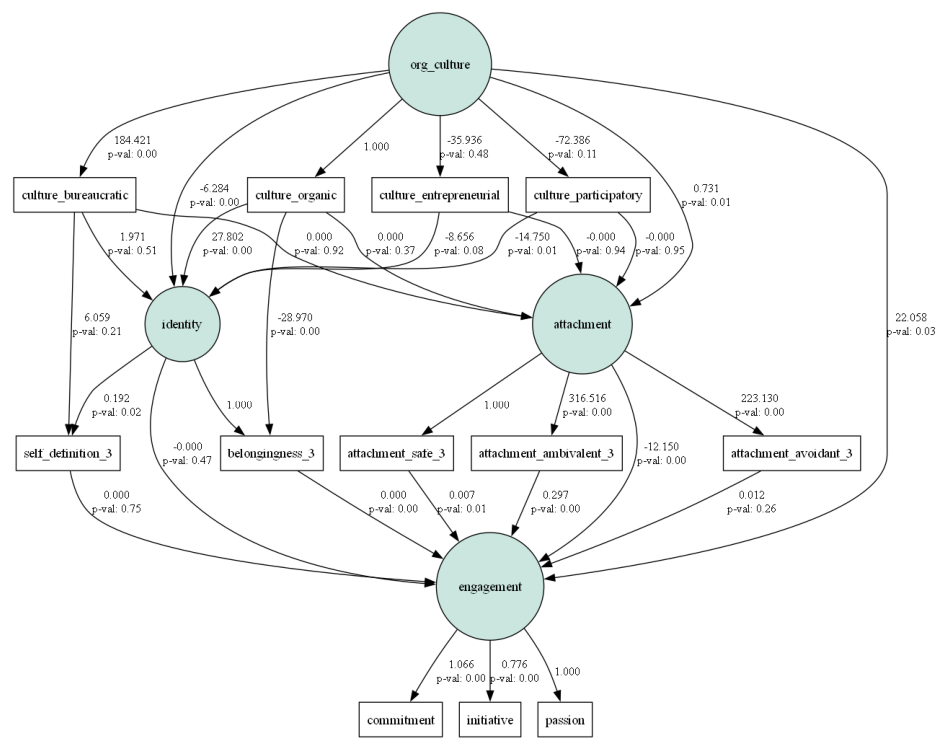

In [34]:
# Сохранение модели в .dot файл
semopy.semplot(model, 'sem_model.dot')

# Чтение и рендеринг с высоким разрешением через Graphviz
graph = graphviz.Source.from_file('sem_model.dot')
graph.format = 'png'
graph.render(filename='sem_model', format='png', cleanup=False)

# Отображение изображения
print("SEM Model diagram")
img = plt.imread('sem_model.png')
plt.figure(figsize=(12, 12))  # Увеличиваем размер для отображения
plt.imshow(img)
plt.axis('off')
plt.show()